# Predeterminación de la supervivencia del Titanic


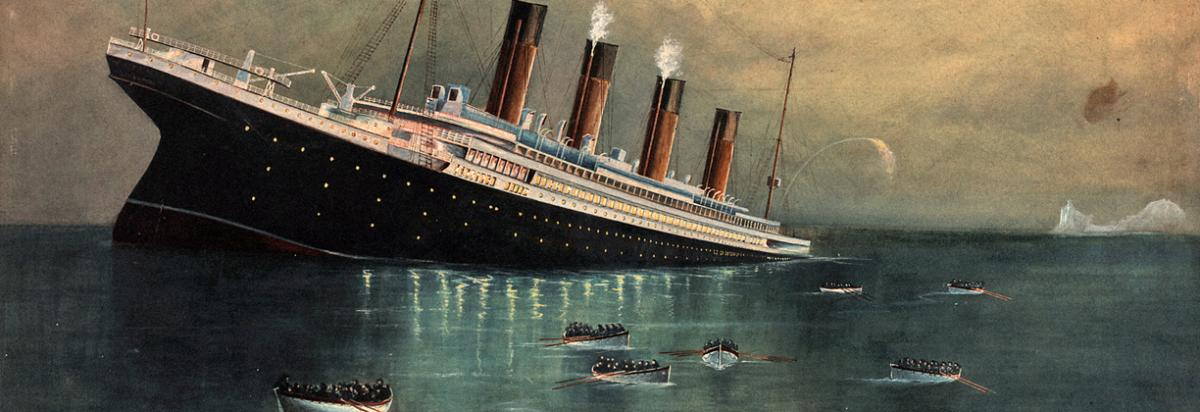

Dada la base de datos "Titanic", que nos aporta información en referencia a los pasajeros del barco Titanic, vamos a observar el comportamiento de los datos y estudiar la supervivencia de los tripulantes en base a su sexo y a su estatus económico o poder adquisitivo, que podremos deducir a través de las diferentes columnas del dataset.

El **objetivo** será estudiar si algunos de los pasajeros tenían a priori más probabilidades de sobrevivir al desastre en base a estas características. 

Las variables que encontramos son las siguientes:

| Variable | Definición | Leyenda |
|--------------|--------------|--------------|
| PassengerId | número único para identificar a cada pasajero||
| Survived | supervivencia | 0 = no sobrevivió; 1 = sí sobrevivió |
| Pclass | clase en la que viajaba | 1 = primera clase; 2 = segunda clase; 3 = tercera clase |
| Name | nombre completo del pasajero ||
| Sex | sexo del pasajero ||
| Age | edad del pasajero ||
| SibSp | número de hermanos/as y/o cónyuges en el barco ||
| Parch | número de padres y/o hijos en el barco ||
| Ticket | número de ticket ||
| Fare | tarifa ||
| Cabin | número de cabina ||
| Embarked | puerto de embarque | C = Cherbourg; Q = Queenstown; S = Southampton |

Observaremos los datos que contiene nuestro dataset y, a continuación, analizaremos las relaciones.

In [64]:
# importamos las librerías que necesitaremos a lo largo del proyecto

import pandas as pd
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt

In [65]:
# leemos el dataset que tenemos en formato csv: 'read_csv'
df = pd.read_csv('titanic.csv')

In [66]:
# pedimos las primeras filas del dataset con el método 'head()' para observar los datos
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Lo primero que observamos es que la columna 'PassengerId' es la clave primaria de la tabla, aportando la información suficiente para utilizarla como índice de nuestros datos.

In [67]:
# creamos un segundo df de forma que no alteraremos el original y podremos volver a consultarlo si es necesario, 
    # definimos la columna 'PassengerId' como índice con 'set_index'

df2 = df.set_index('PassengerId')
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Una vez hemos definido el índice en la columna que queríamos, exploramos un poco más a fondo los datos y las columnas que tiene nuestro dataset:

In [68]:
# observaremos el número de filas y columnas que tiene nuestro dataset con 'shape'
nfil , ncol = df2.shape
print(f'El dataset que tratamos tiene {nfil} filas y {ncol} columnas.')

El dataset que tratamos tiene 891 filas y 11 columnas.


In [69]:
# identificamos los tipos de variable que contiene cada una de las columnas con 'dtypes'

df2.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [70]:
# exploramos, en caso de que los haya, el porcentaje de valores nulos
df2.isnull().sum() / len(df) * 100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [71]:
# generamos el resumen estadístico de las columnas numéricas
df2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Una vez hemos visto las columnas que tenemos, la información que aportan y la cantidad de valores nulos que contienen, sacamos algunas conclusiones que nos ayudarán a limpiar los datos y mantener únicamente aquellos que nos interesan:

* Con más de un 75% de sus valores siendo nulos, la columna "Cabin", que indica el número de cabina en la que estaban alojados, la reparación que hagamos a los datos no nos aportará suficiente información, por lo tanto, prescindimos de ella.

* Las columnas "Age" y "Embarked", que nos indican, respectivamente, la edad de los pasajeros y el puerto en el que embarcaron, tienen cerca de un 20% de valores nulos la primera y menos de un 1% en caso de la segunda. Estas columnas sí que nos pueden aportar información. Vamos a reemplazar los valores nulos de la columna "Embarked" por 0 para rellenar dichos valores, sin embargo, los valores nulos de la columna "Age" se reemplazarán por la moda de los datos, ya que nos dará más información que incorporar un 0.

* La columna 'Ticket' nos indica el número del ticket de cada uno de los pasajeros, siendo esta una información que no nos aporta valor dado nuestro objetivo. Eliminaremos también esta columna para tener solo los datos útiles.

* Nos será útil conocer el número de familiares con el que viaja cada pasajero, juntando la información de las columnas "SibSp" y "Parch".

* Crearemos también una nueva columna de tipo numérico para la variable Sexo para poder analizarla posteriormente donde 0 será hombre y 1 será mujer. 

In [72]:
# eliminamos las columnas "cabin" y "ticket" con 'drop'
df2.drop('Cabin', axis=1, inplace = True)
df2.drop('Ticket', axis=1, inplace = True)

# rellenamos los valores nulos de la columna "Embarked" con un 0
df2['Embarked'].fillna(0, inplace=True)

# rellenamos los valores nulos de la columna "Age" con la moda de los datos
mode = df2['Age'].mode()[0]      # indicamos con '0' que nos devuelva el primer valor de la moda
df2['Age'].fillna(mode, inplace=True)

# creamos una nueva columna con el número de familiares
df2['Family_members'] = df2['SibSp'] + df2['Parch']

# creamos una nueva columna numérica para la variable sexo de forma que nos permitirá hacer comparaciones
df2['nSex'] = df2['Sex'].apply(lambda x: 1 if x == 'female' else 0)

# creamos una nueva columna categórica que indique la supervivencia
df2['Cat_Survived'] = df2['Survived'].map({0: 'no sobrevive', 1: 'sí sobrevive'})

In [73]:
# vemos ahora qué apariencia tiene nuestro dataframe
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_members,nSex,Cat_Survived
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0,no sobrevive
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,1,sí sobrevive
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,1,sí sobrevive
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,1,sí sobrevive
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,0,no sobrevive
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0,0,no sobrevive
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,0,1,sí sobrevive
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,23.4500,S,3,1,no sobrevive


Veamos la proporción de personas que sobrevivieron al desastre de forma gráfica

In [74]:
# creamos la variable que cuenta los valores de la columna categórica que refiere si el pasajero sobrevivió o no
supervivientes = df2['Cat_Survived'].value_counts()

# creamos la figura a partir de dicha variable y le indicamos las características que queremos que tenga

supervivientes_fig = px.pie(df2, 
                            names= supervivientes.index,  
                            values = supervivientes.values, 
                            title=f'Supervivientes', 
                            hole=0.5, 
                            color_discrete_sequence=px.colors.qualitative.Set1)
supervivientes_fig.update_traces(textinfo='percent')

# personalizamos la leyenda

supervivientes_fig.update_layout(legend_title_text='Categorías:', 
                                 legend=dict(orientation="h", 
                                             yanchor="bottom", 
                                             y=1))

# mostramos el gráfico
supervivientes_fig.show()

Estudiemos los datos en relación a la clase en la que viajaban:

In [75]:
# calculamos el promedio de las columnas numéricas en relación con la clase
df2.groupby('Pclass')[['Survived', 'nSex', 'Age', 'SibSp', 'Parch', 'Family_members', 'Fare']].mean()

,Survived,nSex,Age,SibSp,Parch,Family_members,Fare
Pclass,,,,,,,
1,0.629630,0.435185,36.256574,0.416667,0.356481,0.773148,84.154687
2,0.472826,0.413043,29.526250,0.402174,0.380435,0.782609,20.662183
3,0.242363,0.293279,24.824684,0.615071,0.393075,1.008147,13.675550


Estos datos nos indican las siguientes premisas:
* Los viajeros de primera clase son los que tuvieron una tasa de supervivencia significativamente más alta que las demás clases.
* Los viajeros de la tercera clase tienen una proporción mayor de hombres.
* La edad de los viajeros aumenta según la clase es más alta.
* Asimismo, son los viajeros de la tercera clase los que viajan con más familiares.

Observamos gráficamente cual es la correlación que hay entre la supervivencia y los indicadores del estatus o del poder adquisitivo: la clase en la que viajan y la tarifa que han pagado.

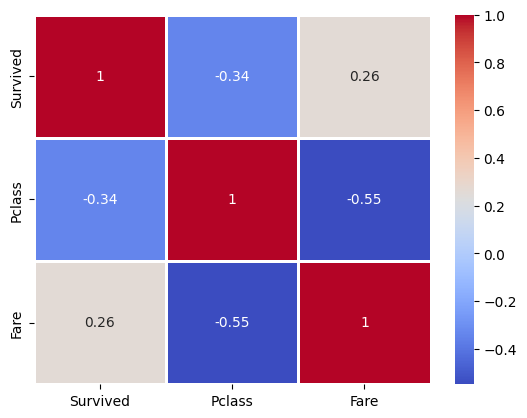

In [76]:
# creamos un segundo df que estará formado por las columnas que nos interesan
df_status = df[['Survived', 'Pclass', 'Fare']]

# observamos la matriz de correlación
df_status.corr()

# creamos la representación gráfica de esta matriz:
matriz_correlacion = df_status.corr()
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=1);

Si miramos la intersección entre la supervivencia y la clase en la que viajan en la matriz, con un valor de -0.34, observamos una correlación negativa moderada por la cual interpretamos que cuanto más baja sea la clase del pasajero (recordemos que la clase más alta es la primera clase y la más baja es la tercera clase), la probabilidad de supervivencia disminuye.

In [77]:
# creamos la figura a partir de la variable "Pclass" y le indicamos las características que queremos que tenga

fig_pclass = px.histogram(df2,
                          x = 'Pclass',
                          barmode = 'group',
                          color = 'Cat_Survived',
                          color_discrete_sequence=px.colors.qualitative.Set1) 
                          
# personalizamos la leyenda

fig_pclass.update_layout(title = 'Supervivencia por clases',
                         legend_title_text='Categorías:', 
                         legend=dict(orientation="h", 
                                     yanchor="bottom", 
                                     y=1))

# mostramos el gráfico
fig_pclass.show()

Vamos a crear una tabla de doble entrada con el porcentaje de mujeres y hombres que sobrevivieron por cada una de las clases existentes.

In [78]:
# creamos la tabla con la función "crosstab"
tabla = pd.crosstab(index=df['Pclass'], 
                    columns=df['Sex'], 
                    values=df['Survived'], 
                    aggfunc='mean') * 100

# mostrar la tabla
print(tabla)

Sex        female       male
Pclass                      
1       96.808511  36.885246
2       92.105263  15.740741
3       50.000000  13.544669


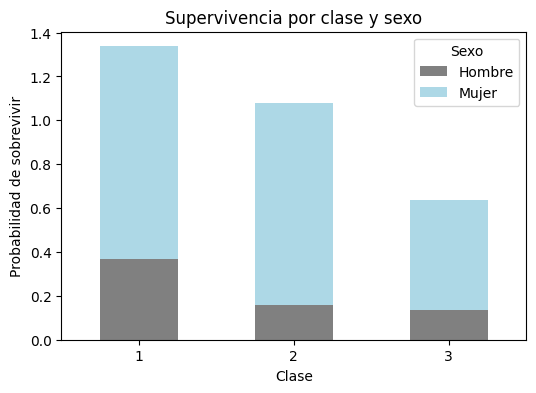

In [79]:
# convertimos esta informacion en una tabla pivotante que nos permitirá crear un gráfico de barras apiladas
df_pivot = df2.pivot_table(index='Pclass', columns='nSex', values='Survived', aggfunc='mean')

# creamos el gráfico
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(6, 4), color=['gray', 'lightblue'])
ax.set_xlabel('Clase')
ax.set_ylabel('Probabilidad de sobrevivir')
ax.set_title('Supervivencia por clase y sexo')

plt.legend(title='Sexo', labels=['Hombre', 'Mujer'])
plt.xticks(rotation=0)  # evitamos la rotación de etiquetas en el eje x
plt.show()


Este gráfico nos muestra que la proporción de supervivientes es destacablemente mayor según la clase es más alta. Asimismo, es interesante ver que, entre los viajeros de todas las clases, el número de mujeres supervivientes es mucho mayor al de los hombres, si bien, como hemos visto antes, el número de hombres viajeros era mayor que el de mujeres.

Concluimos, gracias al análisis realizado, que los viajeros de primera clase abarcan el menor número de no supervivientes, mientras que los viajeros de tercera clase abarcan el mayor número de no supervivientes.
